In [174]:
import numpy as np
import sys
sys.path.append('/Users/zanejobe/Dropbox/GitHub/pyshp') #the directory that contains package

import shapefile
shp = shapefile.Reader("/Users/zanejobe/Desktop/hackathon_models/proximal_small_points_outcrop_line.shp") # Kenilworth
#shp = shapefile.Reader("/Users/zanejobe/Desktop/hackathon_models/modelo_outcrop_line.shp") # Modelo

shapes = shp.shapes() # to display results, type: shapes[0].points

## STUFF TO MODIFY
shapename='KenilworthProxSmall' # this is the filename for exporting a txt file
exportpath='/Users/zanejobe/Dropbox/1 Core Photo ML/_hackathon/' # this is where you want to save the txt file

In [175]:
lon=[coords[0] for coords in shapes[0].points] # pulls the long values out
lat=[coords[1] for coords in shapes[0].points] # pulls the lat values out

# http://all-geo.org/volcan01010/2012/11/change-coordinates-with-pyproj/
import pyproj # use "pip install pyproj" from the command line to install this library (only need to do once)

wgs84=pyproj.Proj("+init=EPSG:4326") # LatLon with WGS84 datum used by GPS units and Google Earth
UTM11N=pyproj.Proj("+init=EPSG:32611") # UTM coords, zone 11N, WGS84 datum

UTMx,UTMy=pyproj.transform(wgs84, UTM11N, lon, lat) # convert from lat long to UTM11N

# now export to text file
np.savetxt(exportpath + shapename + '.dat', np.array(list(zip(UTMx,UTMy))))

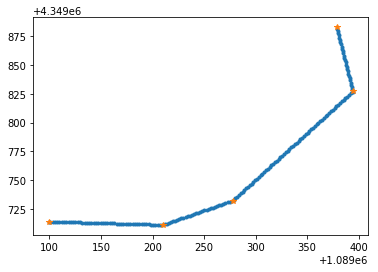

In [176]:
# get them into approximately evenly spaced values (can interparc be called in python?)

# https://stackoverflow.com/questions/19117660/how-to-generate-equispaced-interpolating-values
import math
M = 1000
t = np.linspace(0, len(UTMx), M)
x = np.interp(t, np.arange(len(UTMx)), UTMx)
y = np.interp(t, np.arange(len(UTMy)), UTMy)
tol = 1.5
i, idx = 0, [0]
while i < len(x):
    total_dist = 0
    for j in range(i+1, len(x)):
        total_dist += math.sqrt((x[j]-x[j-1])**2 + (y[j]-y[j-1])**2)
        if total_dist > tol:
            idx.append(j)
            break
    i = j+1

xn = x[idx] # densified x values 
yn = y[idx] # densified y values 

plt.plot(xn, yn, '.')
plt.plot(UTMx, UTMy, '*')
#ax.set_aspect('equal')
plt.show()

In [177]:
# export densified points
np.savetxt(exportpath + shapename + 'Dense.dat', np.array(list(zip(xn,yn))))

In [149]:
## STILL WORKING BELOW HERE

# check the distance pairs to make sure equal spacing 

# make sure they are evenly spaced
i=4
d=math.sqrt((xn[i+1]-xn[i])**2 + (yn[i+1]-yn[i])**2)
print(d)

# # # # # # # how to vectorize this?
distance_xy=math.sqrt((xn[1:]-xn[0:len(xn)-1])**2 + (yn[1:]-yn[0:len(xn)-1])**2)


TypeError: only size-1 arrays can be converted to Python scalars